Codigo ejemplos slides SVM

In [1]:
install.packages("e1071")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




In [2]:
library(cluster)
library(e1071)

##dos clusters de dist. gaussianas

svm.gausianas<-function(tot.puntos=100,gap=2,limite=5,C=1,seed=1,puntos=100){
set.seed(seed)
x<-rnorm(tot.puntos,mean=-gap)
y<-rnorm(tot.puntos,mean=0)
gausianas<-cbind(x,y,rep(1,length(x)))
x<-rnorm(tot.puntos,mean=gap)
y<-rnorm(tot.puntos,mean=0)
gausianas<-rbind(gausianas,cbind(x,y,rep(2,length(x))))
grilla<-((1:puntos)-puntos/2)/puntos*limite*2
grilla<-expand.grid(list(x=grilla,y=grilla))

plot(gausianas[,-3],pch=19,col=1+gausianas[,3],xlab="x",ylab="y",xlim=c(-limite,limite),ylim=c(-limite,limite))
sv<-svm(x=gausianas[,-3], y = factor(gausianas[,3]), scale = TRUE, type = 'C-classification', kernel = "linear", cost=C)
supportvectors<-sv$index
readline("<Enter>")
points(gausianas[supportvectors,-3],pch=19,cex=2.5,col=1+gausianas[supportvectors,3])
pred<-predict(sv,grilla)
readline("<Enter>")
points(grilla,pch=19,cex=0.1,col=1+as.integer(pred))
}


<Enter>
<Enter>
<Enter>
<Enter>


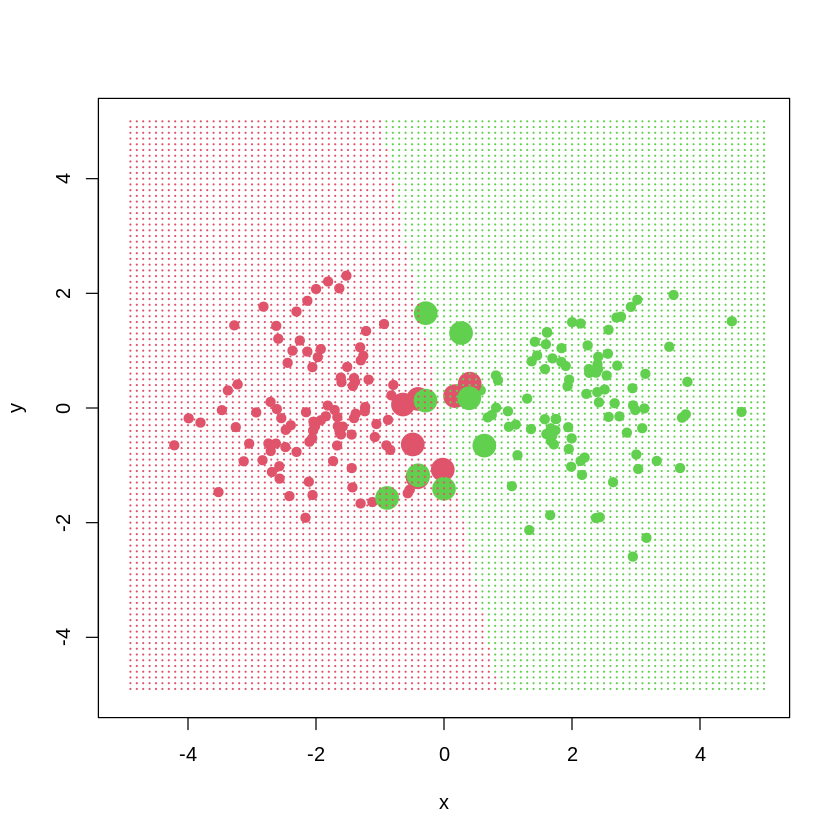

<Enter>
<Enter>


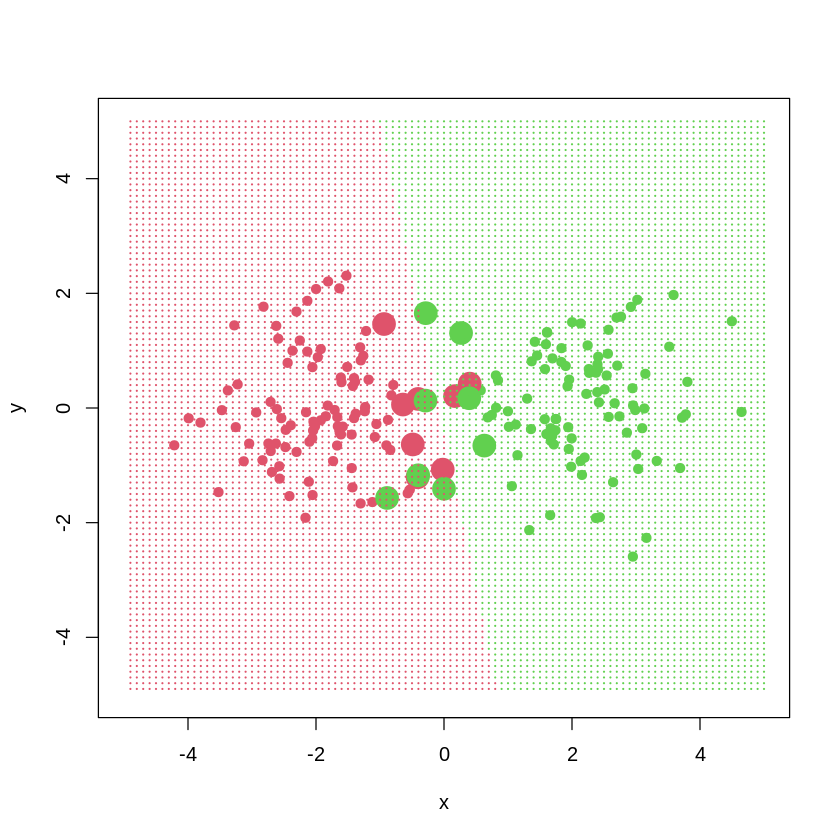

<Enter>
<Enter>


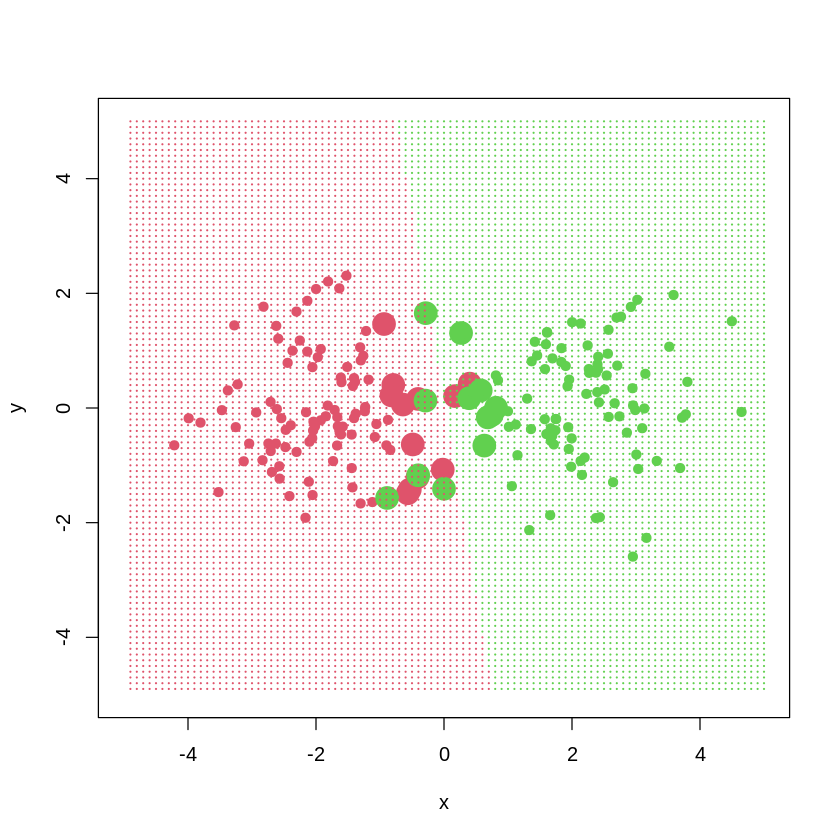

<Enter>
<Enter>


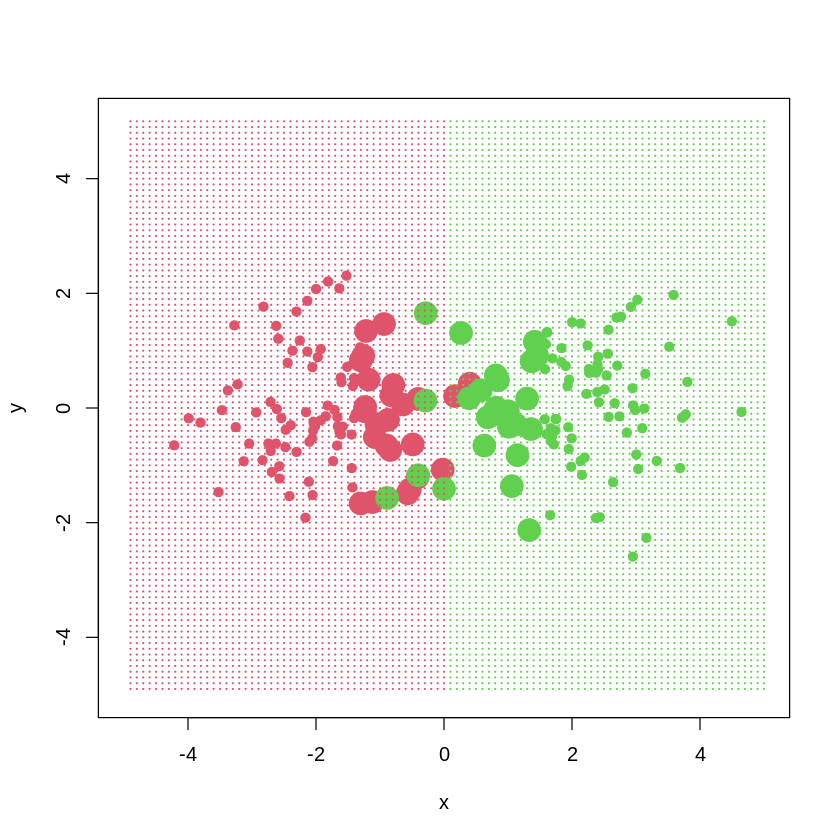

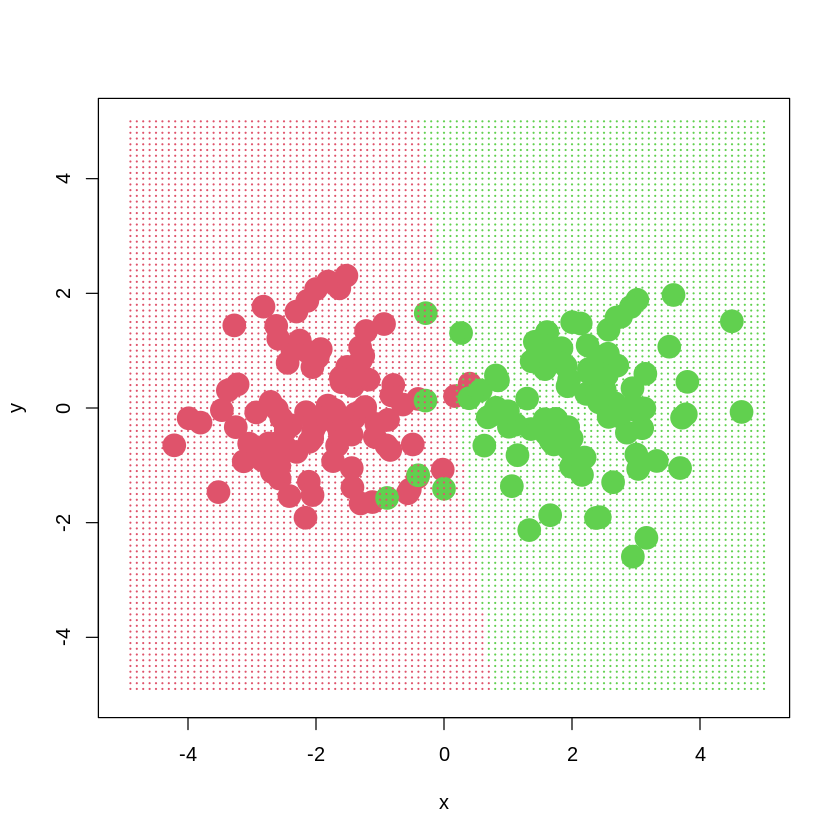

In [3]:

svm.gausianas(C=10000)
svm.gausianas(C=10)
svm.gausianas(C=1)
svm.gausianas(C=0.1)
svm.gausianas(C=0.001)

In [4]:
##moons dataset
svm.moons<-function(tot.puntos=200,gap=-0.1,noise=0.07,limite=2,C=1,seed=1,puntos=100,kernel="radial",gamma=0.01,degree=3){
set.seed(seed)
theta<-runif(tot.puntos,-pi/2+gap,pi/2-gap)
ro<-  rnorm(tot.puntos,1,noise)
x<-ro*cos(theta)-0.1
y<-ro*sin(theta)+0.5
moons<-cbind(x,y,rep(1,length(x)))
theta<-runif(tot.puntos,pi/2+gap,3/2*pi-gap)
ro<-  rnorm(tot.puntos,1,noise)
x<-ro*cos(theta)+0.1
y<-ro*sin(theta)-0.5
moons<-rbind(moons,cbind(x,y,rep(2,length(x))))

grilla<-((1:puntos)-puntos/2)/puntos*limite*2
grilla<-expand.grid(list(x=grilla,y=grilla))

plot(moons[,-3],pch=19,col=1+moons[,3],xlab="x",ylab="y",xlim=c(-limite,limite),ylim=c(-limite,limite))
sv<-svm(x=moons[,-3], y = factor(moons[,3]), scale = TRUE, type = 'C-classification', kernel = kernel, cost=C,gamma=gamma,degree=degree)
supportvectors<-sv$index
readline("<Enter>")
points(moons[supportvectors,-3],pch=19,cex=2.5,col=1+moons[supportvectors,3])
pred<-predict(sv,grilla)
readline("<Enter>")
points(grilla,pch=19,cex=0.1,col=1+as.integer(pred))

}


<Enter>
<Enter>
<Enter>
<Enter>


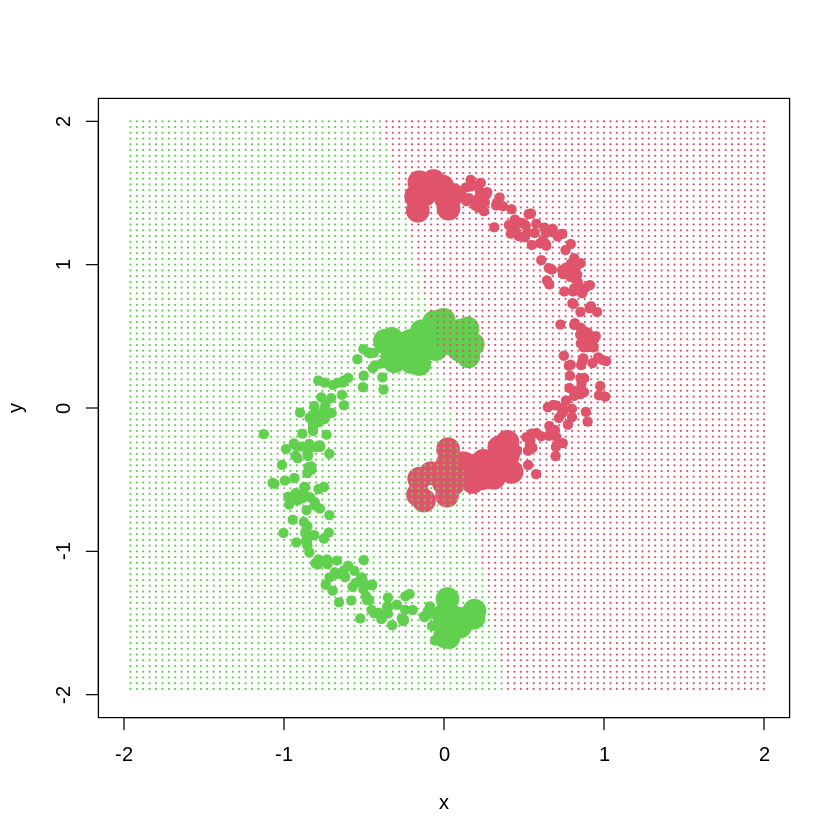

<Enter>
<Enter>


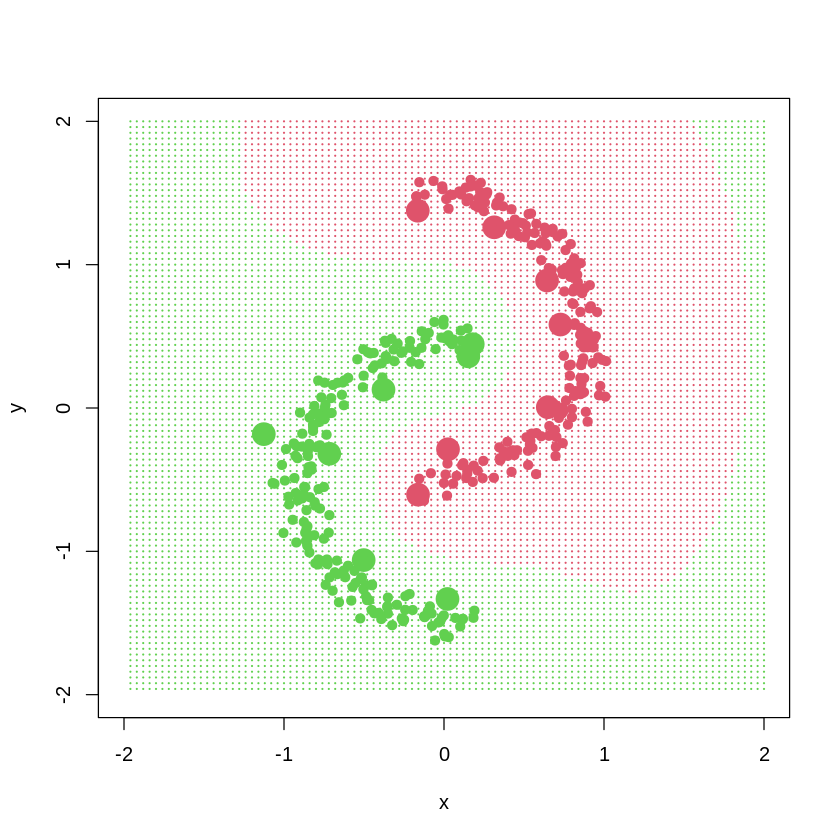

<Enter>
<Enter>


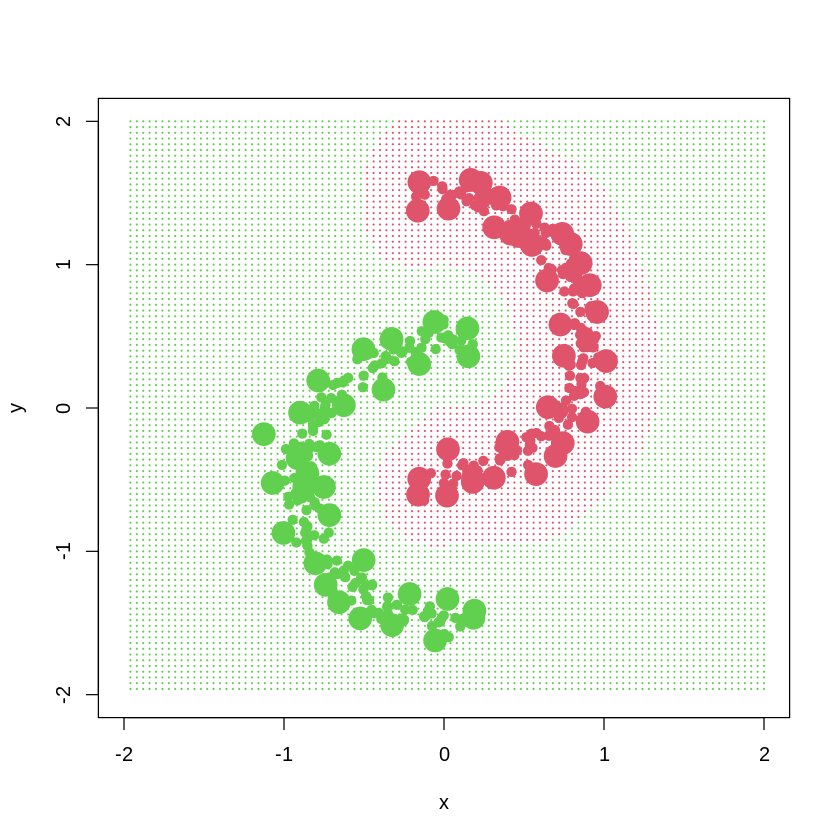

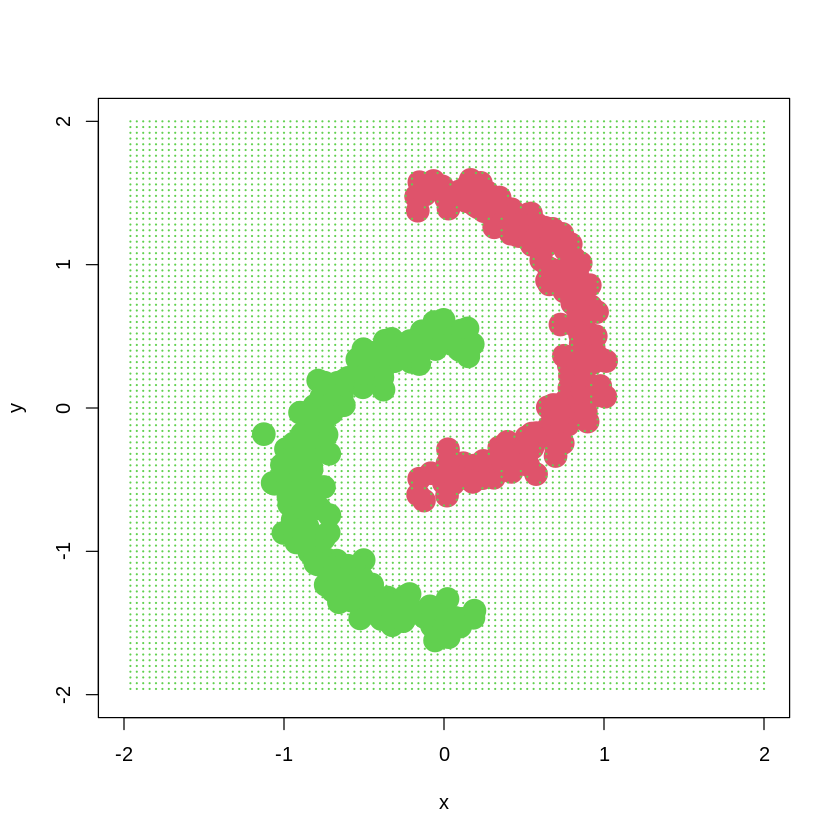

In [ ]:
#veo el gammma
svm.moons(C=10)
svm.moons(C=10,gamma=1)
svm.moons(C=10,gamma=10)
svm.moons(C=10,gamma=1000)

<Enter>
<Enter>
<Enter>
<Enter>


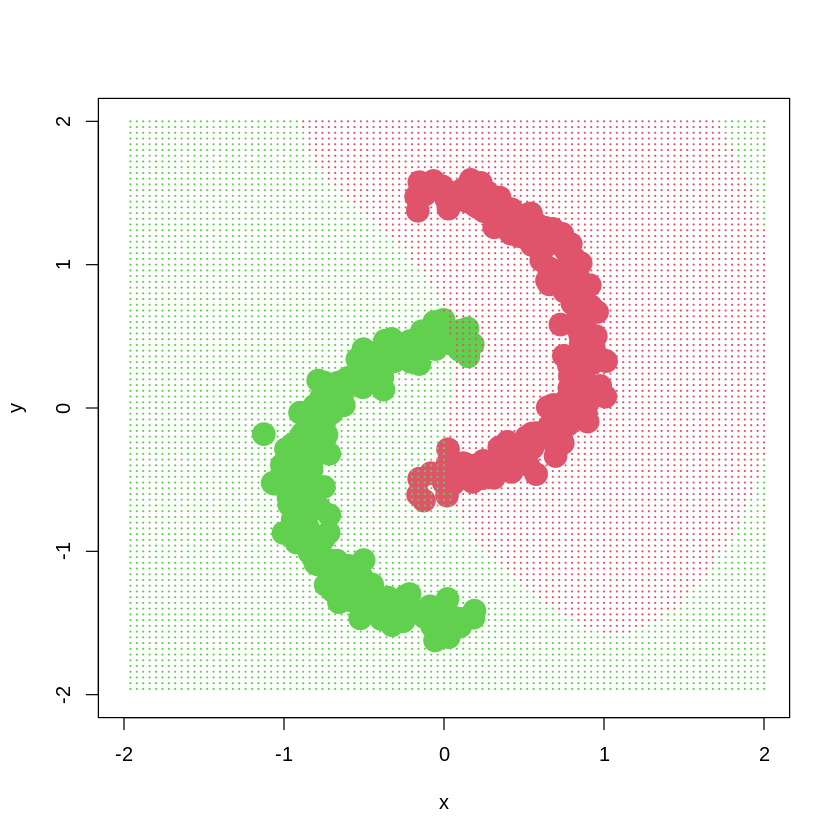

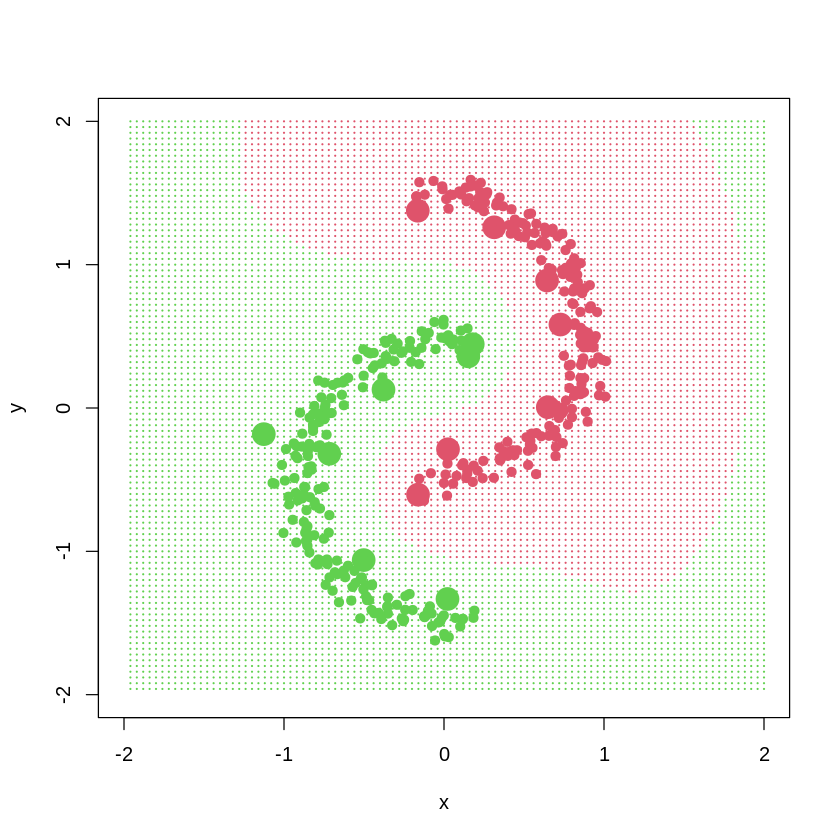

In [ ]:
#ahora el C
svm.moons(C=0.01,gamma=1)
svm.moons(C=1000,gamma=1)


<Enter>
<Enter>
<Enter>
<Enter>


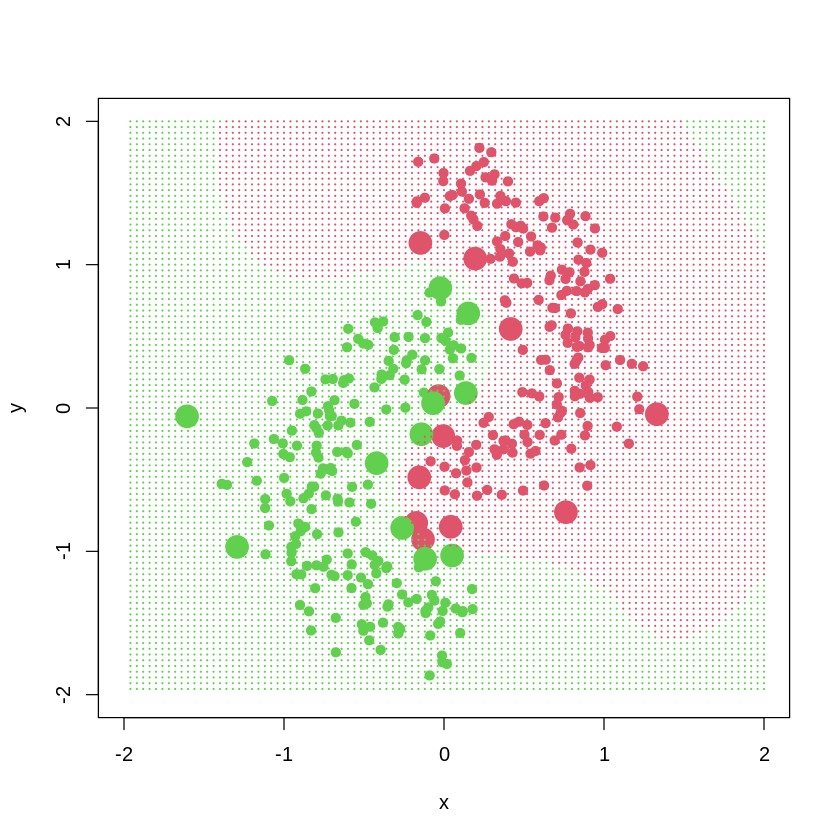

<Enter>
<Enter>


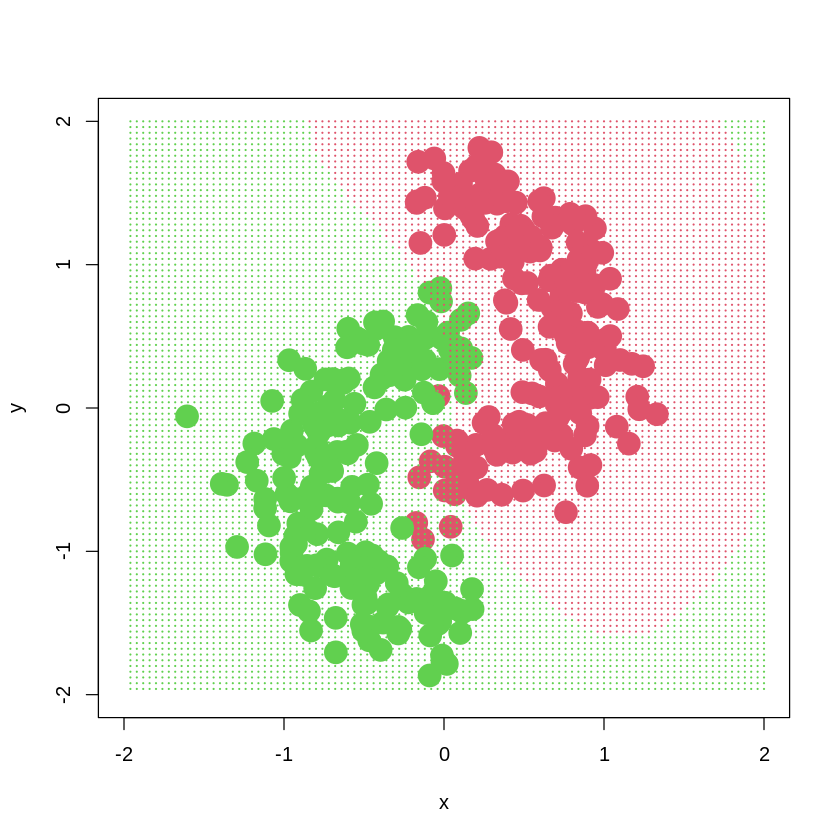

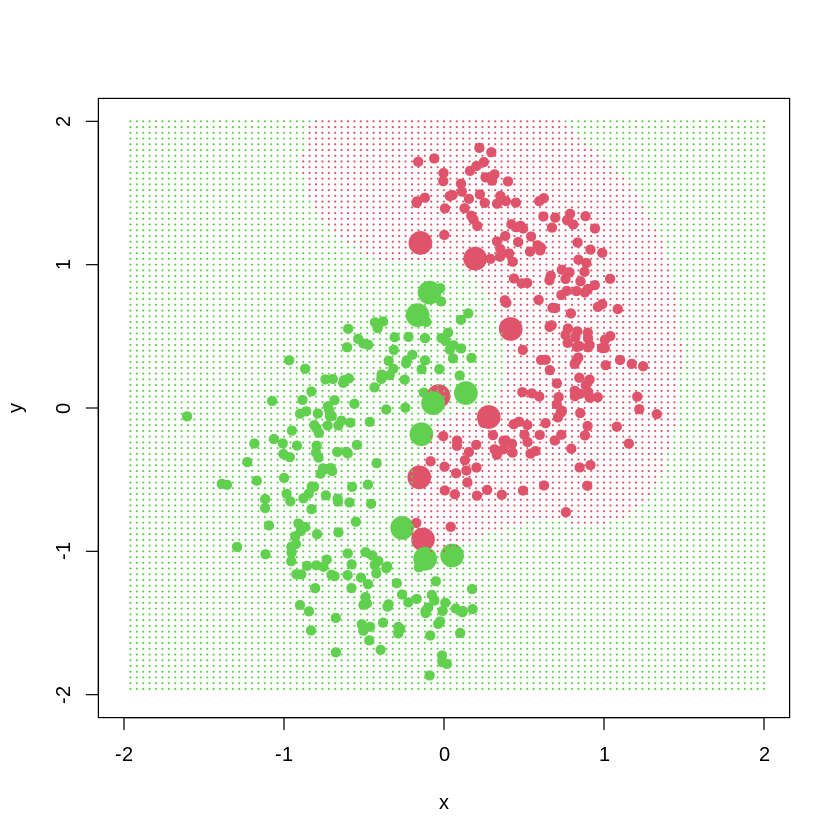

In [ ]:
#con mas ruido
svm.moons(C=10,gamma=1,noise=0.2)
svm.moons(C=0.01,gamma=1,noise=0.2)
svm.moons(C=1000,gamma=1,noise=0.2)
